# Project Name: Quantum Key Distribution(QKD)

# Tahir Sajjad Butt(22120013) and Javed Ali(22120008)

# Submitted to: Sir Sabieh Anwar



# Problem Description

Quantum Key Distribution, is a method of secure communication that uses the principles of quantum mechanics to ensure the confidentiality of messages transmitted between parties. Unlike traditional encryption methods that rely on mathematical algorithms and computational power, QKD is based on the fundamental laws of physics, which cannot be broken or hacked. In today's world, we do not have such kind of Quantum computers that can break the classcial cryptography but we can build in the future. In future, we need to look for Quantum Cryptography which can use as a way of secure communication

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
print("Imports Successful")

Imports Successful


# The QKD BB-84 Protocol

# Without Eve interfernece

In [3]:
def GenerateRandomBit():
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.measure(0,0)
    aer_sim = Aer.get_backend('aer_simulator')
    job = aer_sim.run(assemble(qc))
    results = job.result().get_counts()
    if(results['1']>results['0']):
        return 1
    return 0
def GenerateRandomBits(size):  
    random=[]
    for i in range(size):
        random.append(GenerateRandomBit())
    return random
GenerateRandomBits(10)   

[0, 0, 0, 0, 1, 0, 0, 1, 1, 1]

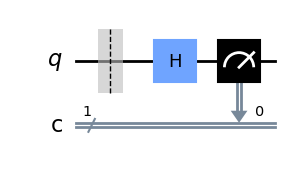

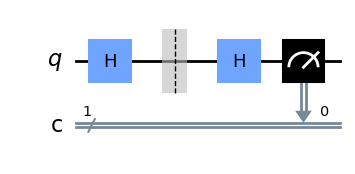

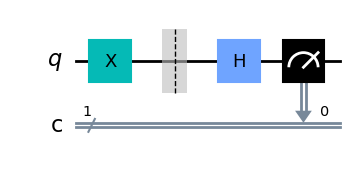

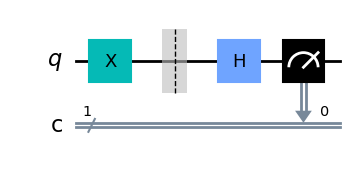

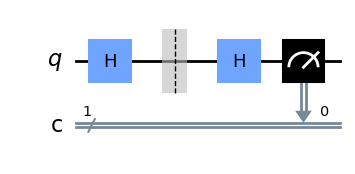

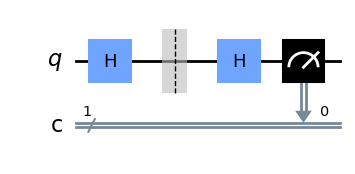

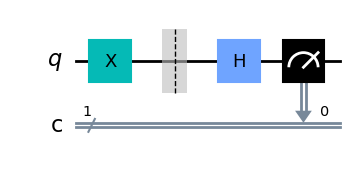

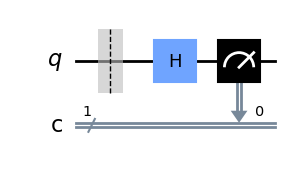

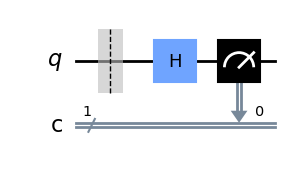

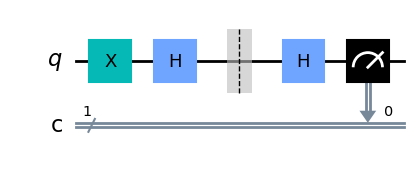

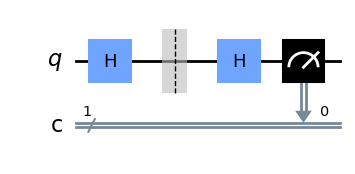

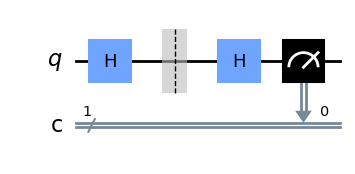

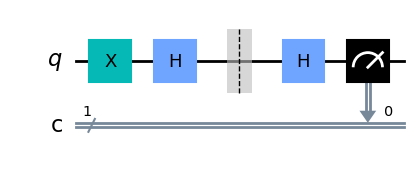

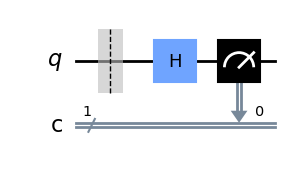

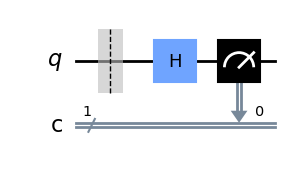

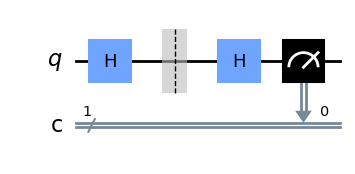

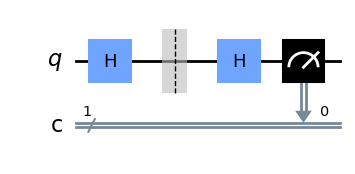

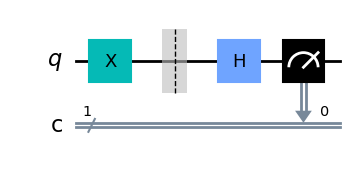

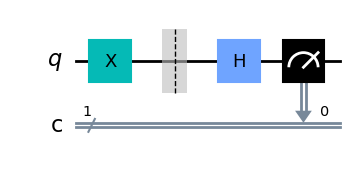

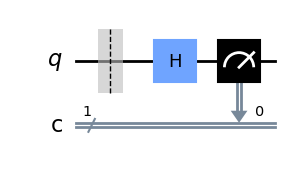

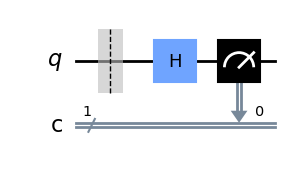

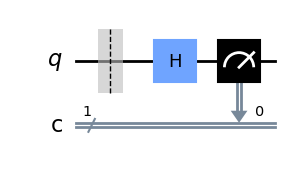

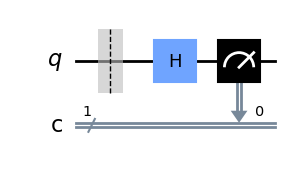

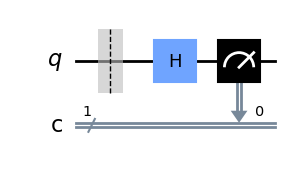

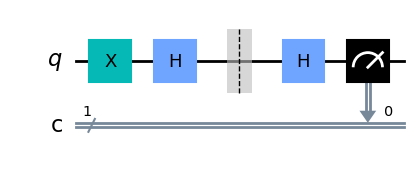

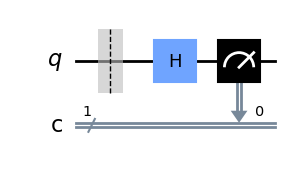

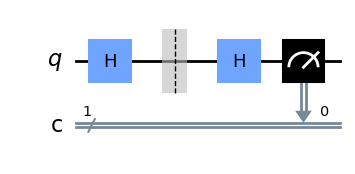

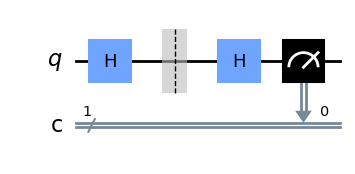

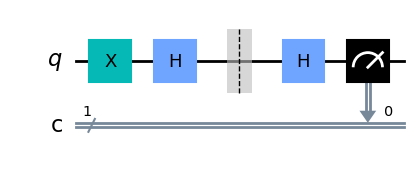

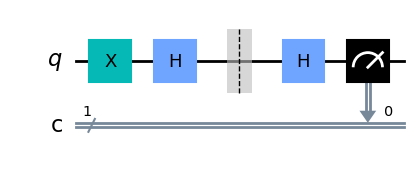

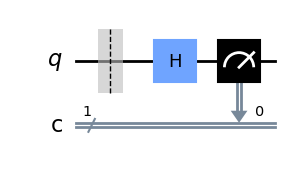

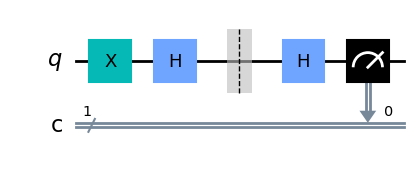

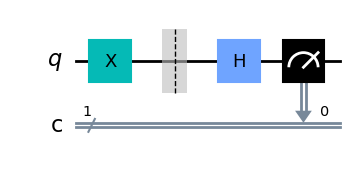

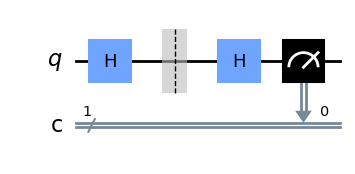

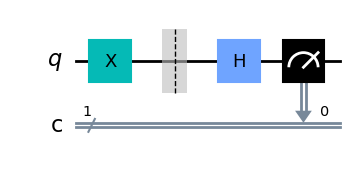

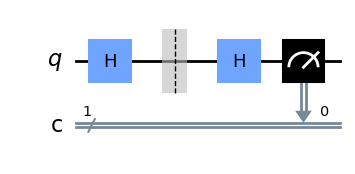

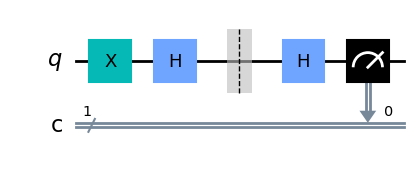

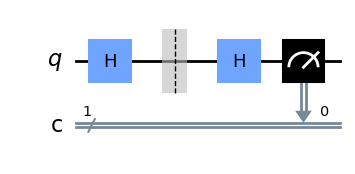

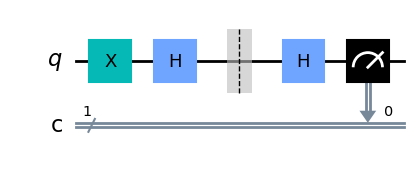

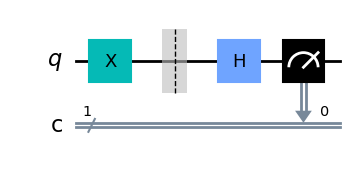

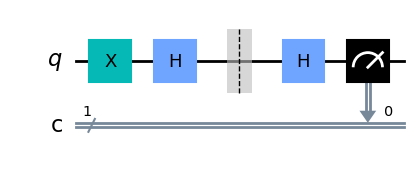

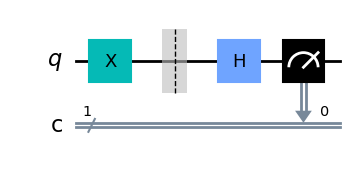

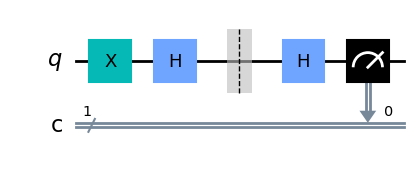

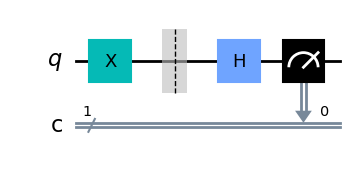

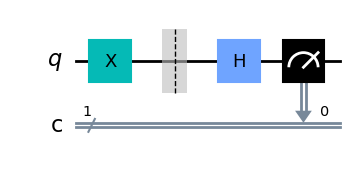

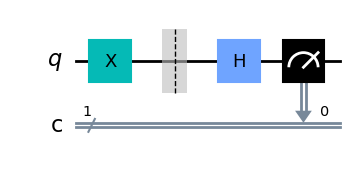

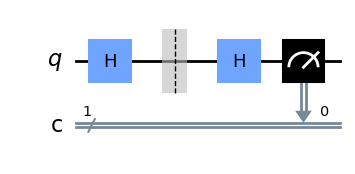

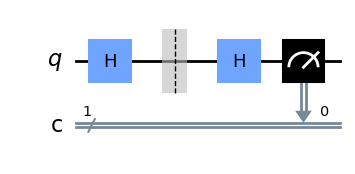

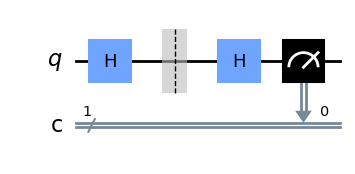

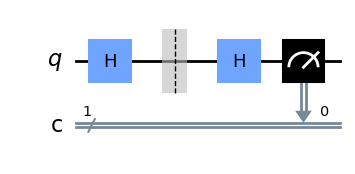

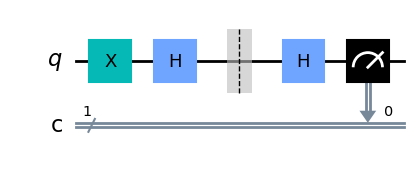

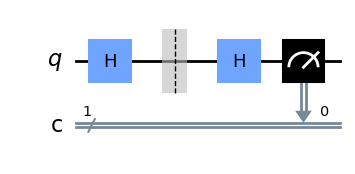

A_bits [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]
A_bases [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
B_bases [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]
bob_result [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

True

In [70]:
import numpy as np

## Step 1
# Alice generates bits
A_bits = GenerateRandomBits(100)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
A_bases = GenerateRandomBits(100)

B_bases = GenerateRandomBits(100)


def encode_message(A_bits, A_bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if A_bases[i] == 0: # Prepare qubit in Z-basis
            if A_bits[i] == 0:
                pass        # ket \0>
            else:
                qc.x(0)     # ket \1>
        else: # Prepare qubit in X-basis
            if A_bits[i] == 0:
                qc.h(0)     #ket\+>
            else:
                qc.x(0)   
                qc.h(0)     #ket\->
        qc.barrier()
        message.append(qc)
    return message

message=encode_message(A_bits, A_bases)
def measure_message(message, B_bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if B_bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if B_bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
            display(message[q].draw('mpl'))
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

bob_result=measure_message(message, B_bases)




def remove_garbage(A_bases, B_bases,bob_result):
    good_bits = []
    for q in range(n):
        if A_bases[q] == B_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bob_result[q])
    return good_bits

alice_key= remove_garbage(A_bases, B_bases, A_bits)
bob_key= remove_garbage(A_bases, B_bases,bob_result)


alice_key==bob_key



bits=15
selection = randint(n, size=bits)
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

alice_sample= sample_bits(alice_key, selection)
bob_sample= sample_bits(bob_key, selection)



print('A_bits',A_bits)
print("A_bases",A_bases)
print("B_bases",B_bases)
print('bob_result',(bob_result))
print('Alice key', alice_key)
print("Bob key", bob_key ) 
print('Alice sample',alice_sample)
print('Bob sample',bob_sample)
print("length of alice_key",len(alice_key))
alice_sample==bob_sample


# With Eve Interferance

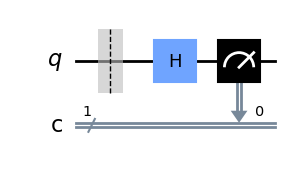

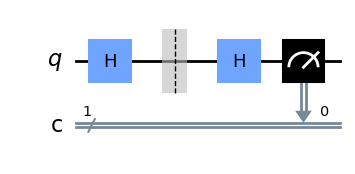

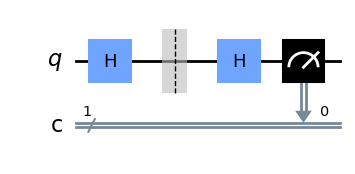

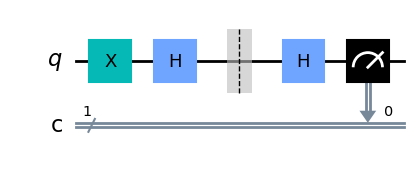

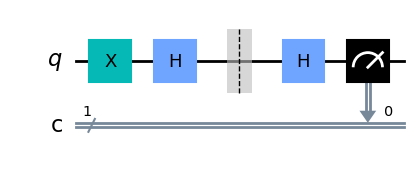

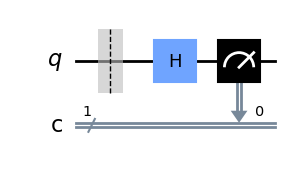

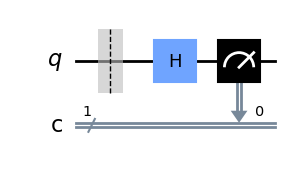

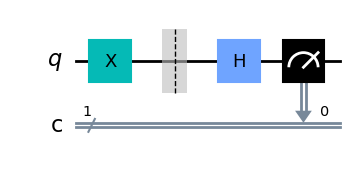

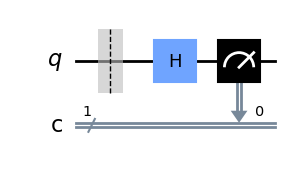

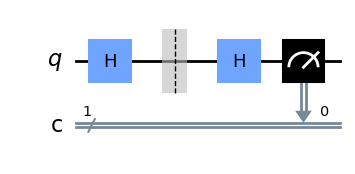

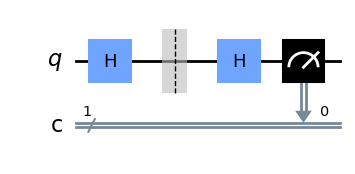

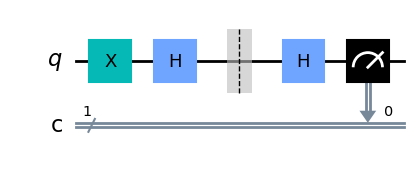

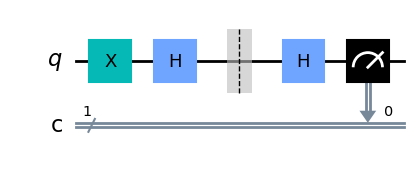

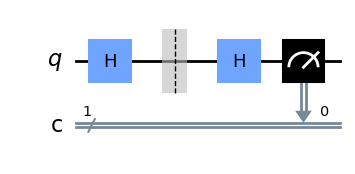

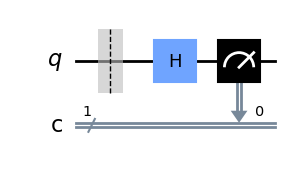

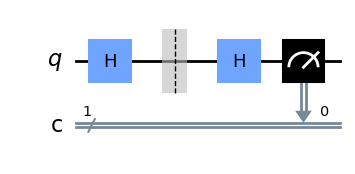

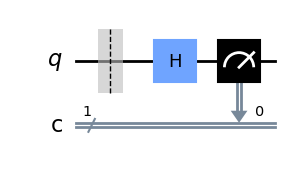

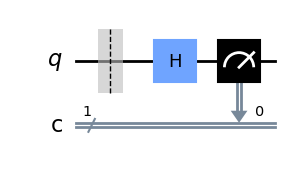

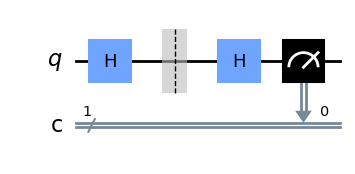

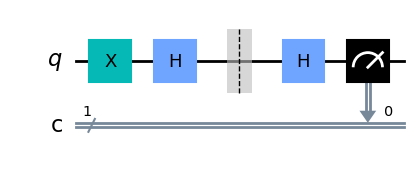

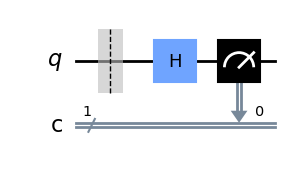

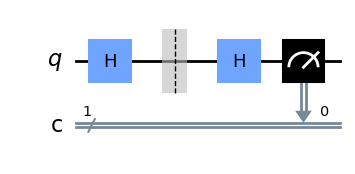

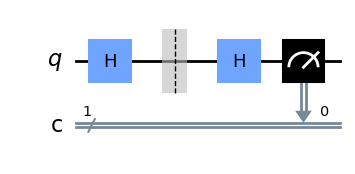

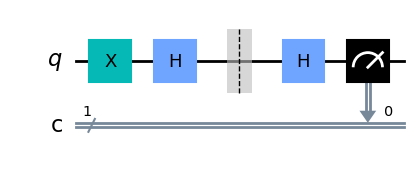

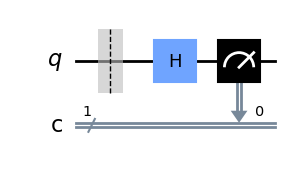

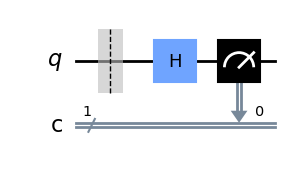

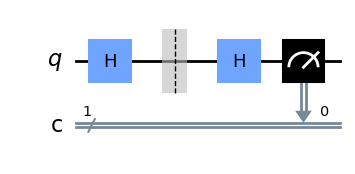

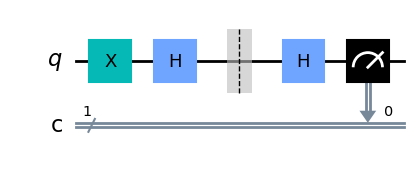

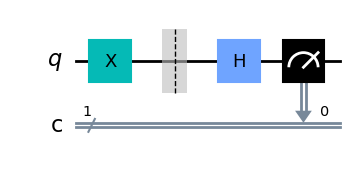

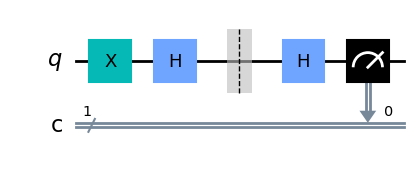

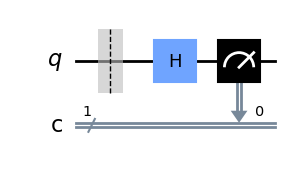

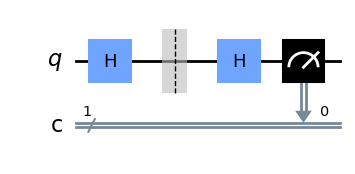

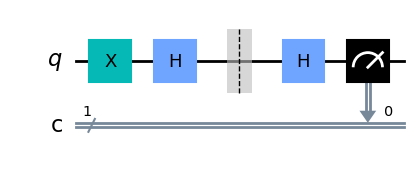

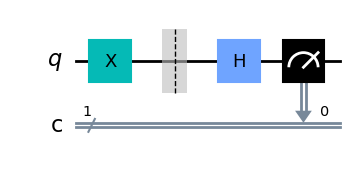

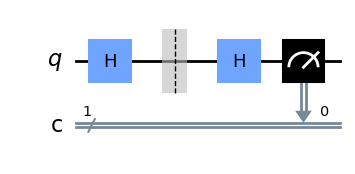

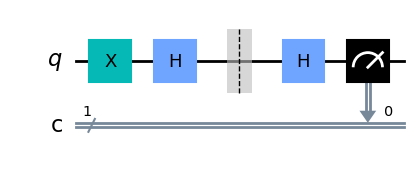

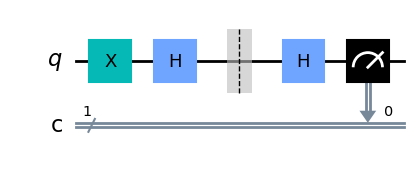

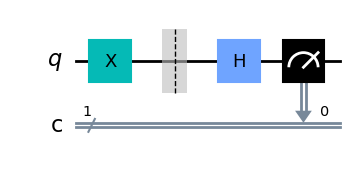

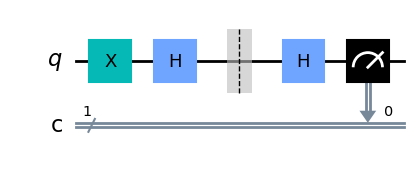

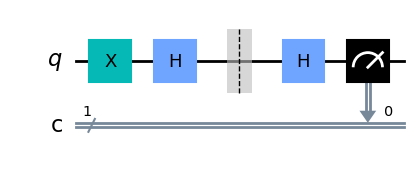

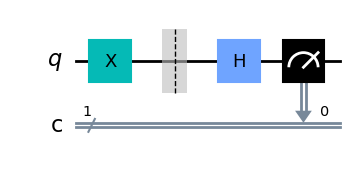

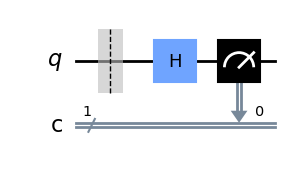

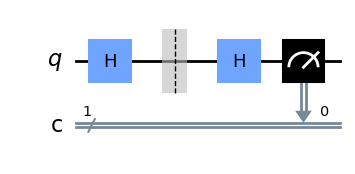

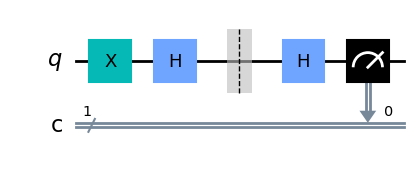

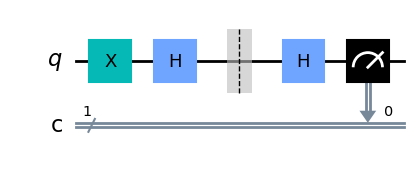

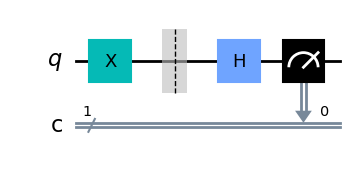

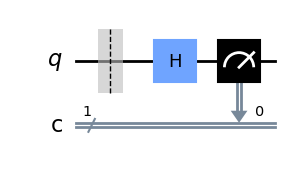

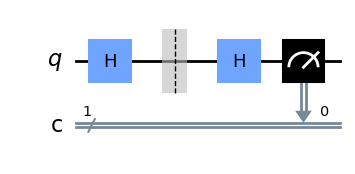

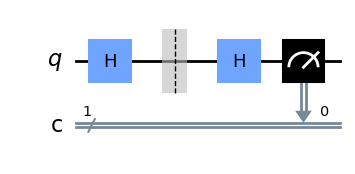

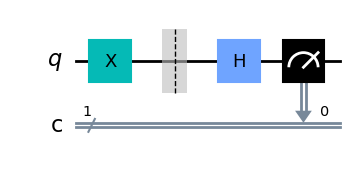

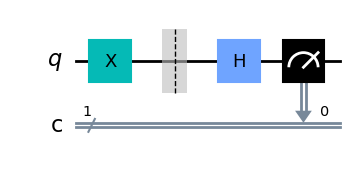

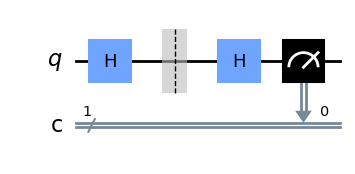

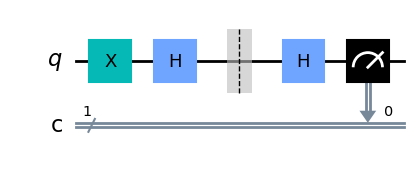

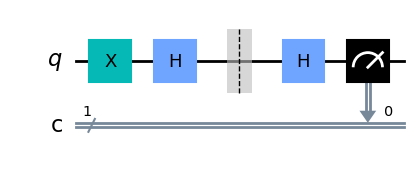

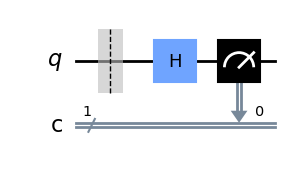

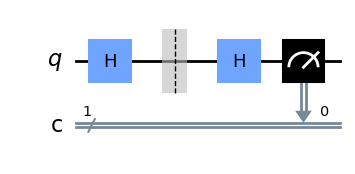

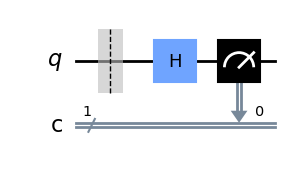

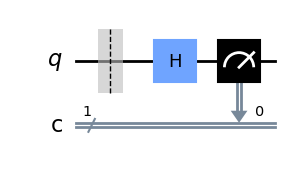

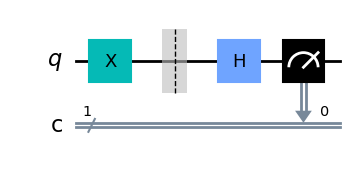

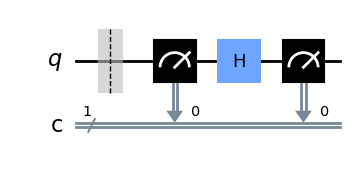

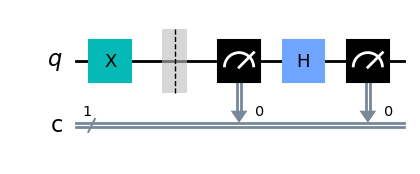

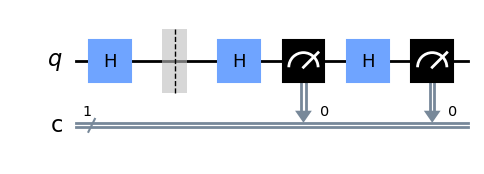

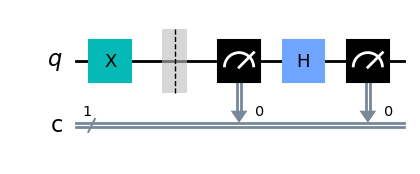

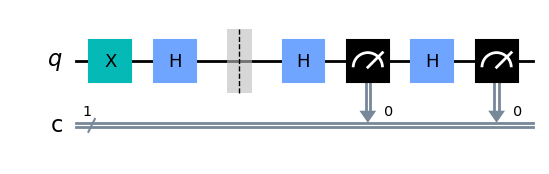

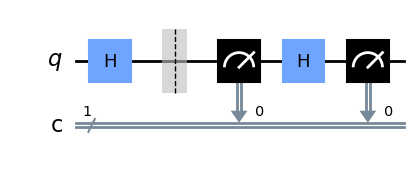

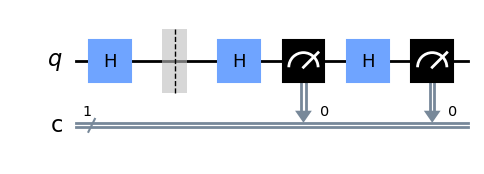

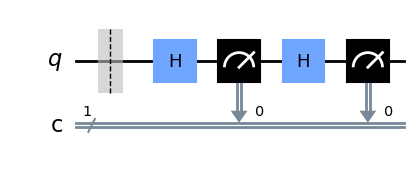

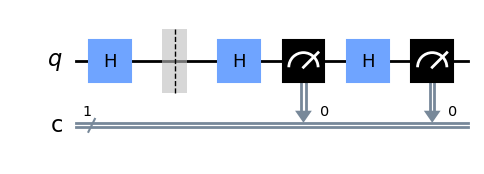

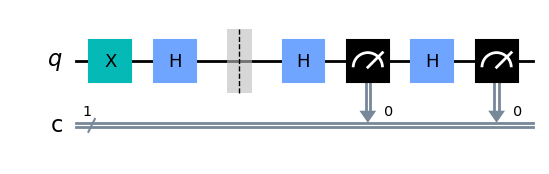

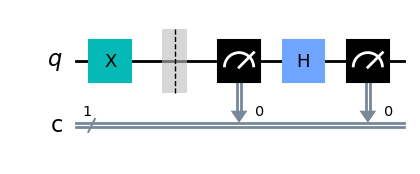

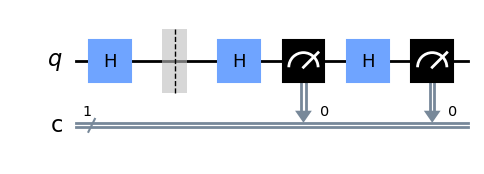

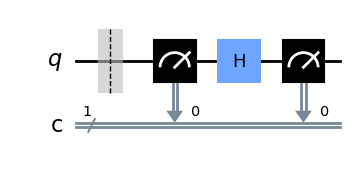

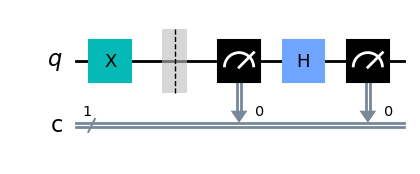

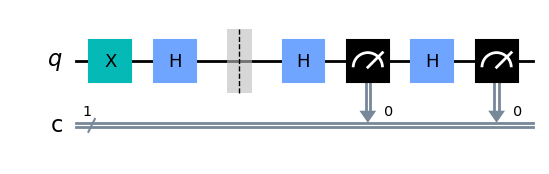

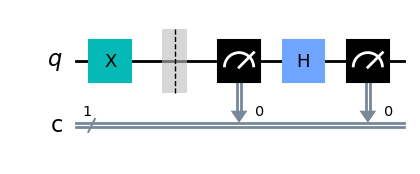

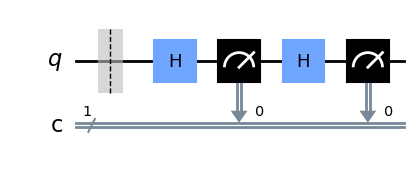

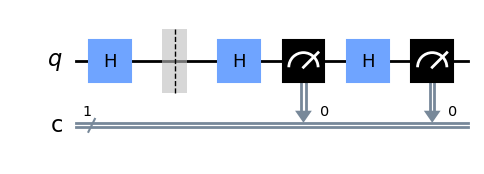

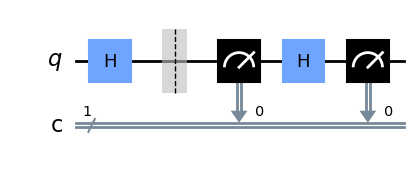

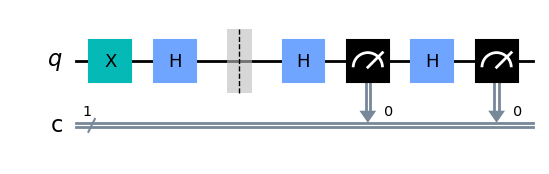

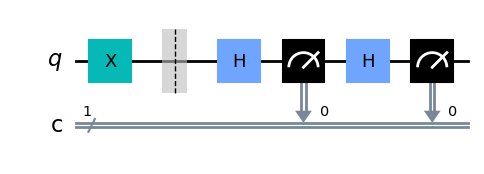

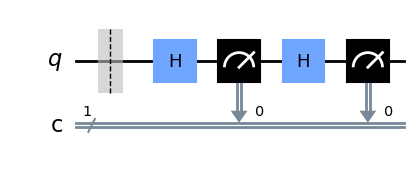

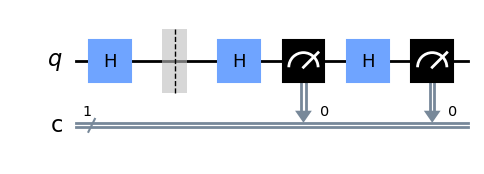

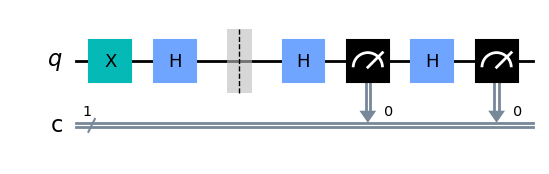

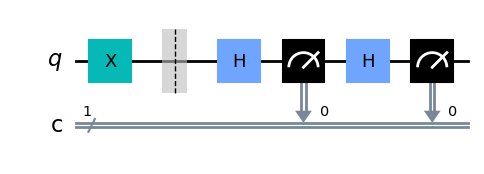

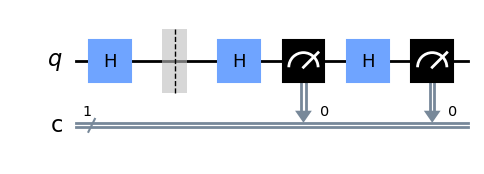

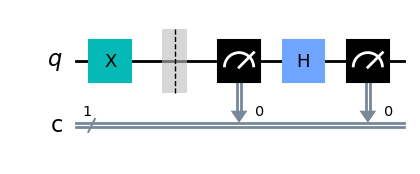

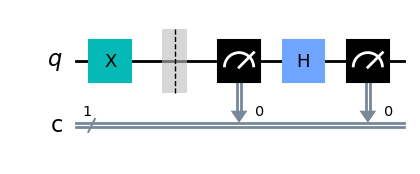

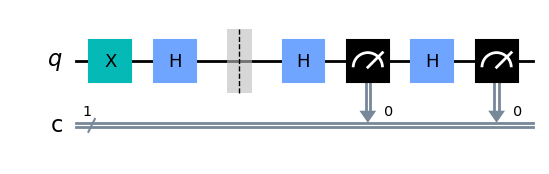

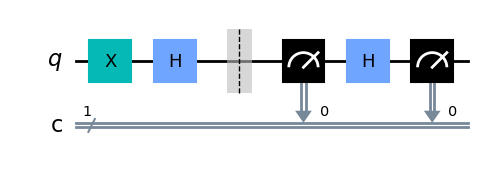

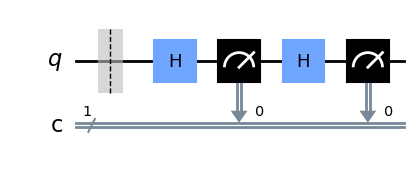

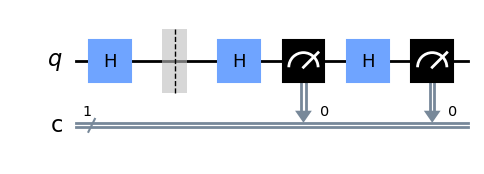

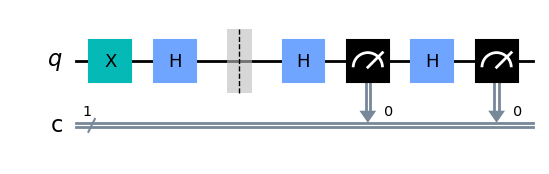

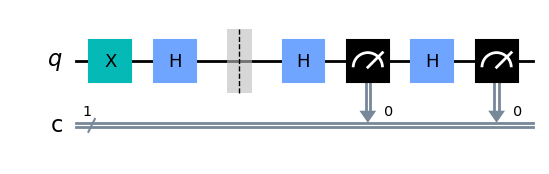

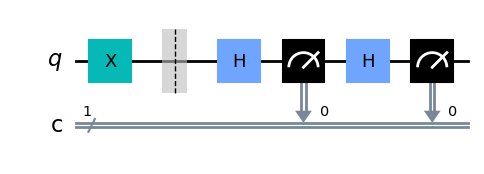

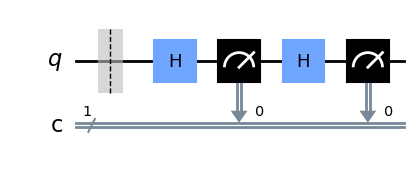

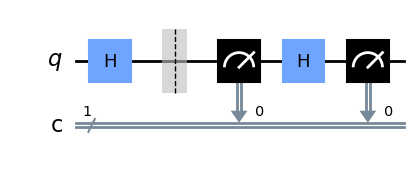

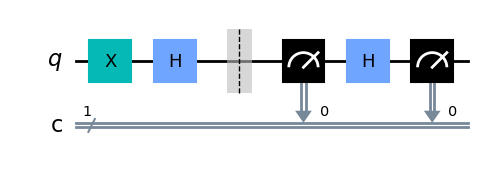

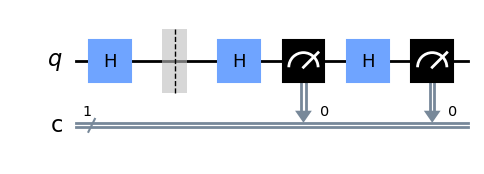

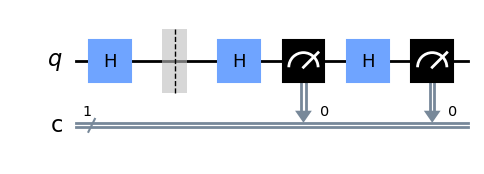

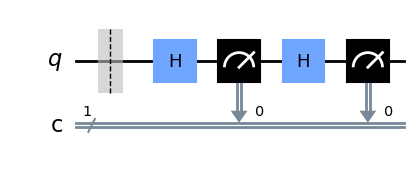

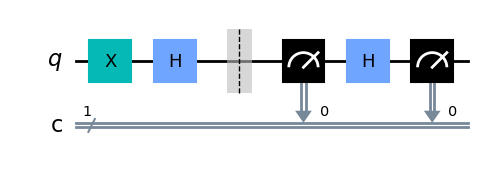

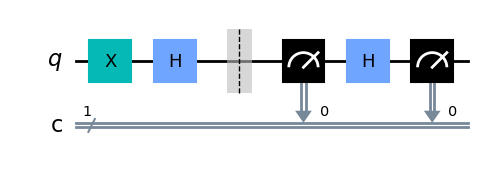

bob_result [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0]
eve interception [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
Alice key [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
Bob key [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
length of Alice_key 42
length of Bob_key 42
Alice sample [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0

In [71]:
import numpy as np


## Step 1
# Alice generates bits
A_bits = GenerateRandomBits(100)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
A_bases = GenerateRandomBits(100)

B_bases = GenerateRandomBits(100)

eve_bases = GenerateRandomBits(100)

def encode_message(A_bits, A_bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if A_bases[i] == 0: # Prepare qubit in Z-basis
            if A_bits[i] == 0:
                pass        # ket \0>
            else:
                qc.x(0)     # ket \1>
        else: # Prepare qubit in X-basis
            if A_bits[i] == 0:
                qc.h(0)     #ket\+>  
            else:
                qc.x(0)
                qc.h(0) # ket\->
        qc.barrier()
        message.append(qc)
    return message

message=encode_message(A_bits, A_bases)
def measure_message(message, eve_bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if eve_bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if eve_bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
            display(message[q].draw('mpl'))
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements


intercepted_message = measure_message(message, eve_bases)

def measure_message(intercepted_message, B_bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if B_bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if B_bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
            display(message[q].draw('mpl'))
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

bob_result=measure_message(intercepted_message, B_bases)


def remove_garbage(A_bases, B_bases,bob_result):
    good_bits = []
    for q in range(n):
        if A_bases[q] == B_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bob_result[q])
    return good_bits

alice_key= remove_garbage(A_bases, B_bases, A_bits)
bob_key= remove_garbage(A_bases, B_bases,bob_result)



bits=15
selection = randint(n, size=bits)
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

alice_sample= sample_bits(alice_key, selection)
bob_sample= sample_bits(bob_key, selection)

print('bob_result',(bob_result))
print('eve interception',(intercepted_message))
print('Alice key', alice_key)
print("Bob key", bob_key ) 
print("length of Alice_key",len(alice_key))
print("length of Bob_key",len(bob_key))
print('Alice sample',alice_sample)
print('Bob sample',bob_sample)

alice_sample==bob_sample
if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")


# Error Correction of BB-84 Protocol

In [72]:
alice_key= remove_garbage(A_bases, B_bases, A_bits)
bits=alice_key

print("A_bits",bits)
# Define the Hamming code functions
def parity_check(bits):
    # Calculates the parity bits for the given bits
    n = len(bits)
    k = n - int(np.log2(n)) - 1
    parity = [0] * (n - k)
    for i in range(n - k):
        for j in range(2**i - 1, n, 2**(i+1)):
            parity[i] ^= bits[j]
    return parity
print("parity check",parity_check(bits))

def encode_hamming(bits):
    # Encodes the given bits using Hamming code
    n = len(bits)
    k = int(np.log2(n+1))
    code = [0] * (n + k)
    j = 0
    for i in range(n + k):
        if i == 2**j - 1:
            j += 1
        else:
            code[i] = bits[i-j]
    parity = parity_check(code)
    for i in range(len(parity)):
        code[2**i-1] = parity[i]
    return code
print('encode_hamming',encode_hamming(bits))

def decode_hamming(bits):
    # Decodes the given bits using Hamming code
    n = len(bits)
    k = n - int(np.log2(n)) - 1
    syndrome = [0] * (n - k)
    for i in range(n - k):
        for j in range(2**i - 1, n, 2**(i+1)):
            syndrome[i] ^= bits[j]
    if sum(syndrome) == 0:
        return bits[:k]
    else:
        error_index = sum([2**i for i, b in enumerate(syndrome) if b == 1]) - 1
        corrected_bits = bits.copy()
        corrected_bits[error_index] ^= 1
        return corrected_bits[:k]
print('decode_hamming(bits)',decode_hamming(bits))

A_bits [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
parity check [0, 1, 0, 0, 1, 1]
encode_hamming [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
decode_hamming(bits) [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]


In [73]:
bob_key= remove_garbage(A_bases, B_bases,bob_result)

bits=bob_key
print("bits",bits)

# Define the Hamming code functions
def parity_check_2(bits):
    # Calculates the parity bits for the given bits
    n = len(bits)
    k = n - int(np.log2(n)) - 1
    parity = [0] * (n - k)
    for i in range(n - k):
        for j in range(2**i - 1, n, 2**(i+1)):
            parity[i] ^= bits[j]
    return parity
print("parity check",parity_check_2(bits))

def encode_hamming_2(bits):
    # Encodes the given bits using Hamming code
    n = len(bits)
    k = int(np.log2(n+1))
    code = [0] * (n + k)
    j = 0
    for i in range(n + k):
        if i == 2**j - 1:
            j += 1
        else:
            code[i] = bits[i-j]
    parity = parity_check(code)
    for i in range(len(parity)):
        code[2**i-1] = parity[i]
    return code
print('encode_hamming',encode_hamming_2(bits))

def decode_hamming_2(bits):
    # Decodes the given bits using Hamming code
    n = len(bits)
    k = n - int(np.log2(n)) - 1
    syndrome = [0] * (n - k)
    for i in range(n - k):
        for j in range(2**i - 1, n, 2**(i+1)):
            syndrome[i] ^= bits[j]
    if sum(syndrome) == 0:
        return bits[:k]
    else:
        error_index = sum([2**i for i, b in enumerate(syndrome) if b == 1]) - 1
        corrected_bits = bits.copy()
        corrected_bits[error_index] ^= 1
        return corrected_bits[:k]
print('decode_hamming(bits)',decode_hamming_2(bits))


Alice_final_key=decode_hamming(bits)
Bob_final_key=decode_hamming_2(bits)

print("Alice_final_key",Alice_final_key)
print("Bob_final_key",Bob_final_key)

Alice_final_key==Bob_final_key



bits [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
parity check [0, 0, 0, 0, 0, 0]
encode_hamming [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
decode_hamming(bits) [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Alice_final_key [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Bob_final_key [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]


True

# Privacy Amplication of BB-84

In [74]:
import hashlib
Alice_final_key

private_key = ''.join([bin(num)[2:].zfill(1) for num in Alice_final_key]) # combine the binary numbers into a single binary string


private_key

# assume the random seed for the hash function is stored as a binary string in the variable 'seed'
seed = "111001000110011101101111"

# apply the BBR protocol by hashing the raw key with the seed
hash_object = hashlib.sha256((private_key+seed).encode())
secure_key = hash_object.digest()


print("Alice_final_key",Alice_final_key)
print("private_key",private_key)
print("length of private_key",len(private_key))
# print the secure key in binary format
print("Secure key :", secure_key)

binarySecure=''.join(format(byte, '08b') for byte in secure_key)

print("Secure key binary:", len(binarySecure))
print("length of Secure key",len(secure_key))
print("Final_key",binarySecure)

Alice_final_key [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
private_key 100001111011110100000000100101100000100101101001010
length of private_key 51
Secure key : b'\x19\xa5\x83\xe0\x96\xa9\xc5\x92+\x05H\xeb8y\xa6?7:\x0e\x08c\xbe\xd0_\x93\x98\x16\x1ePa5\xef'
Secure key binary: 256
length of Secure key 32
Final_key 0001100110100101100000111110000010010110101010011100010110010010001010110000010101001000111010110011100001111001101001100011111100110111001110100000111000001000011000111011111011010000010111111001001110011000000101100001111001010000011000010011010111101111


# The QKD B92 Protocol

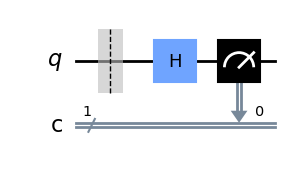

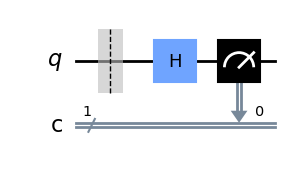

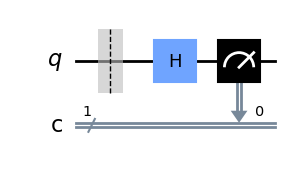

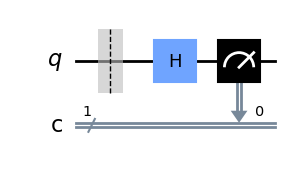

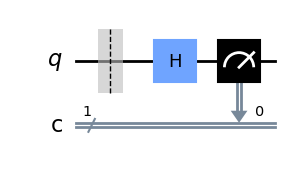

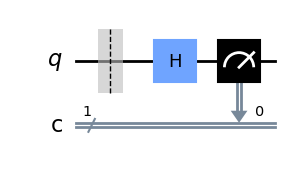

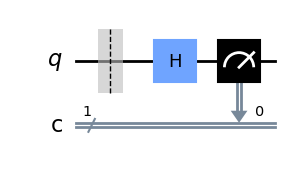

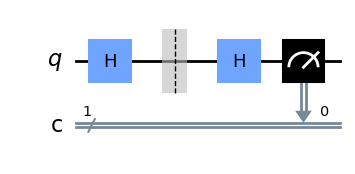

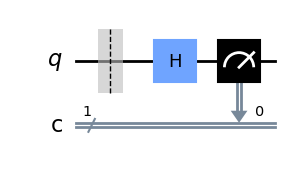

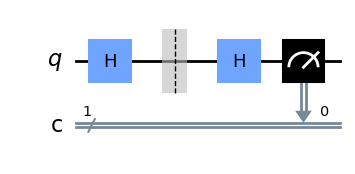

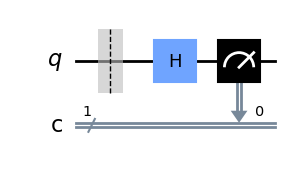

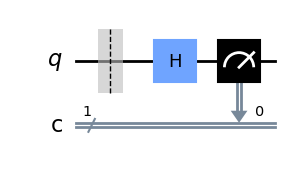

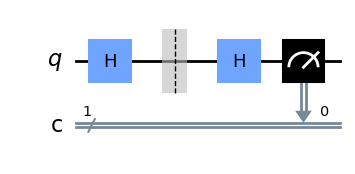

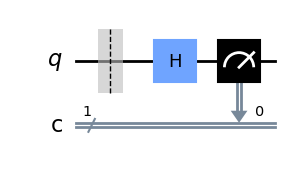

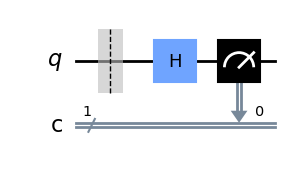

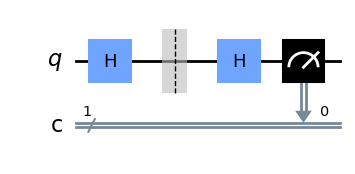

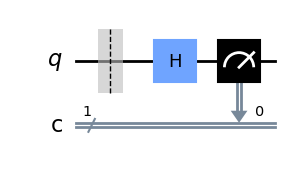

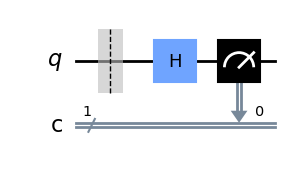

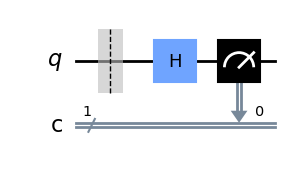

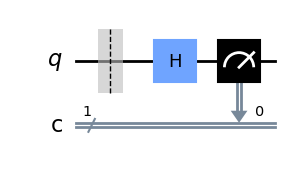

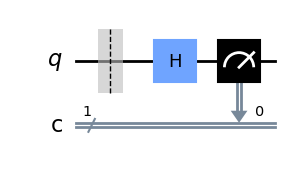

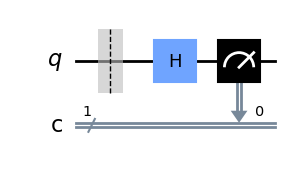

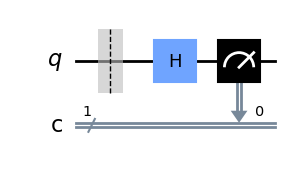

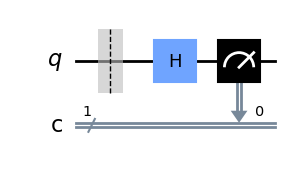

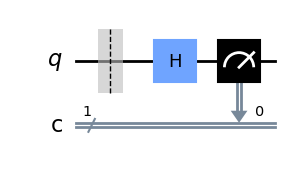

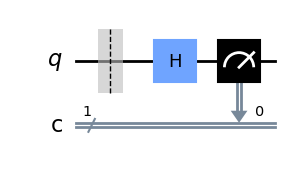

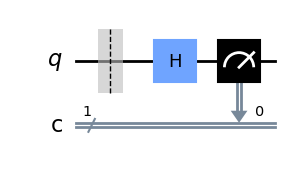

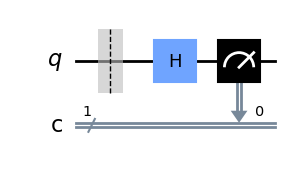

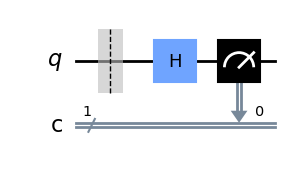

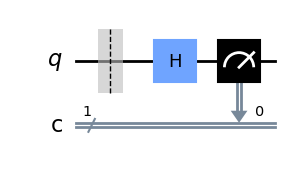

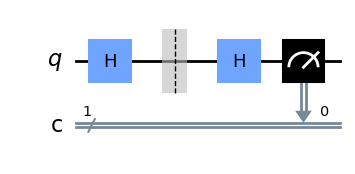

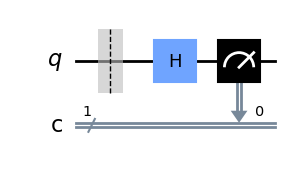

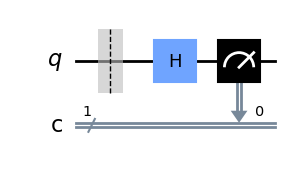

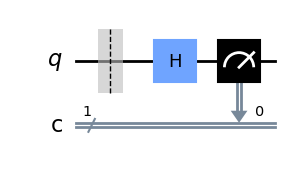

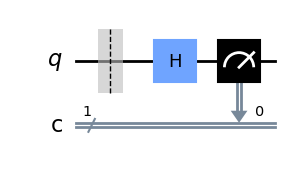

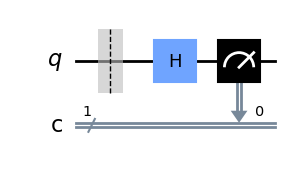

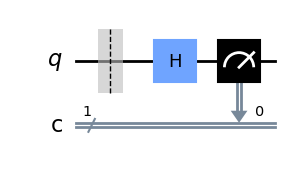

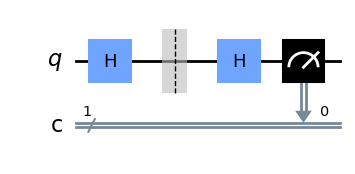

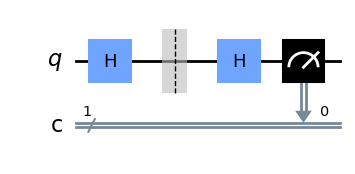

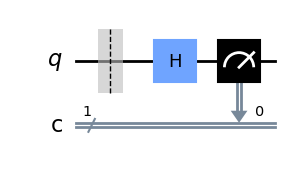

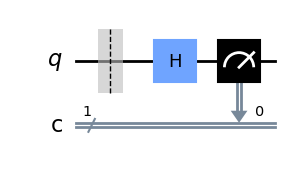

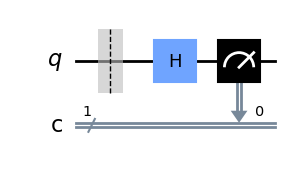

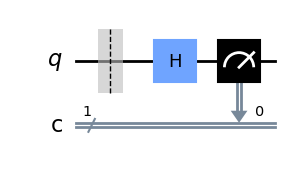

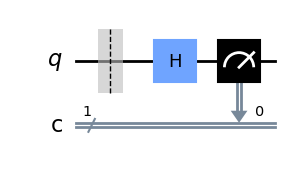

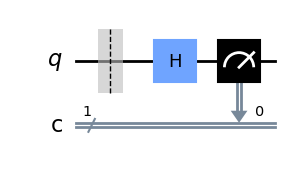

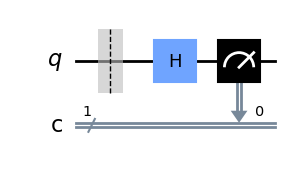

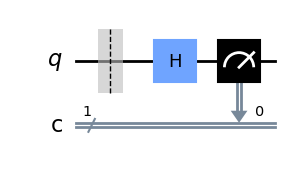

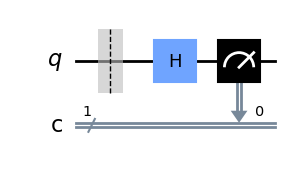

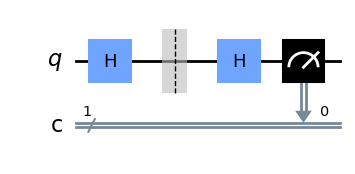

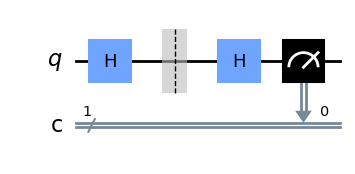

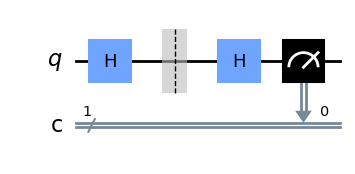

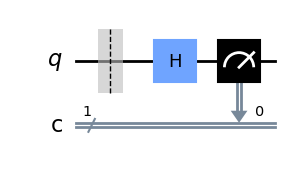

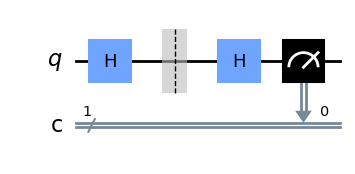

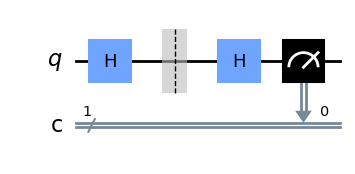

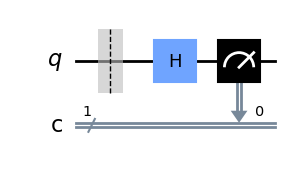

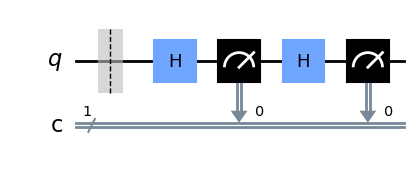

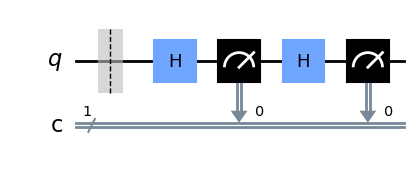

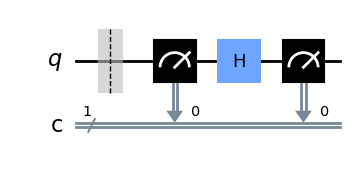

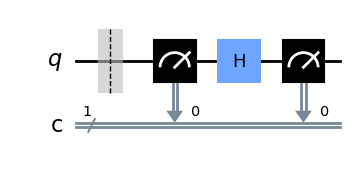

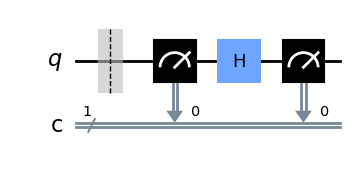

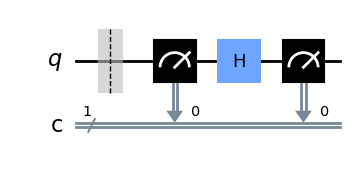

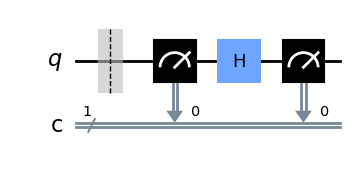

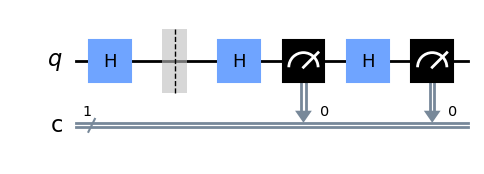

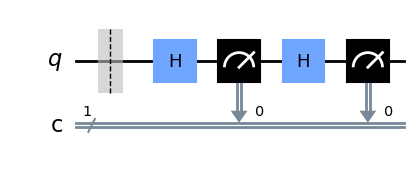

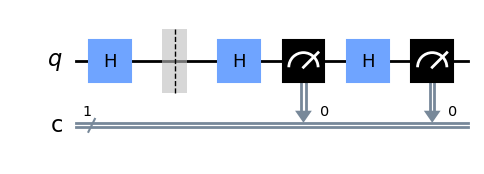

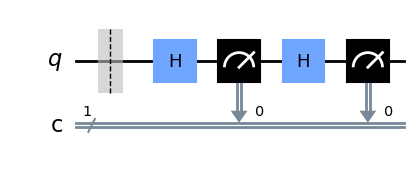

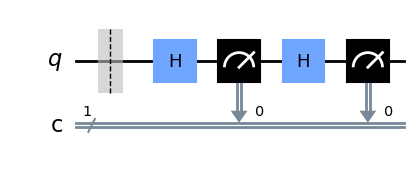

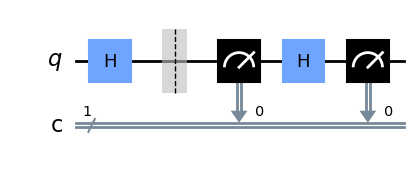

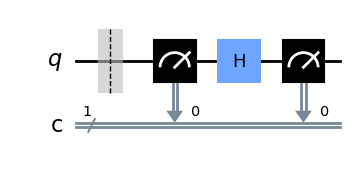

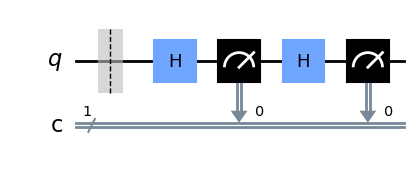

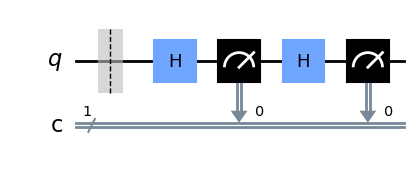

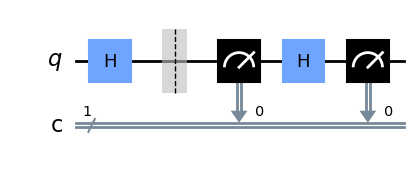

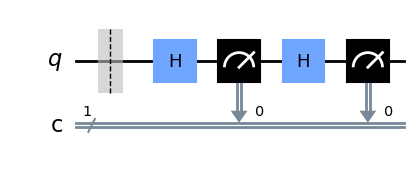

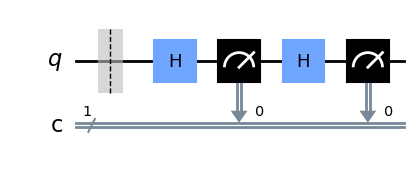

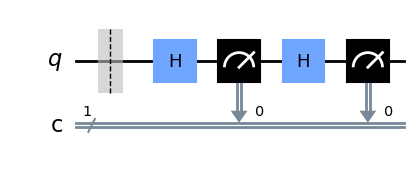

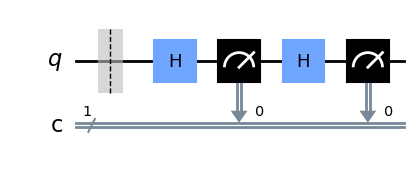

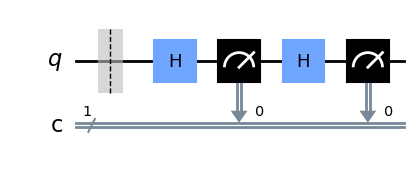

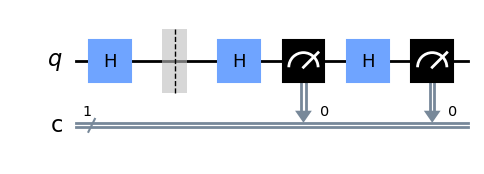

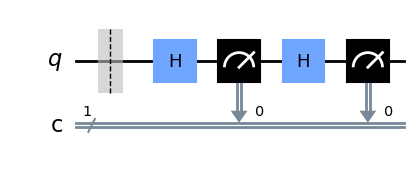

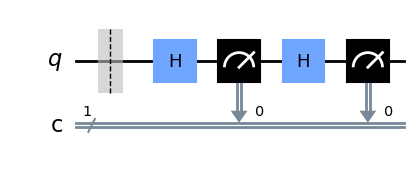

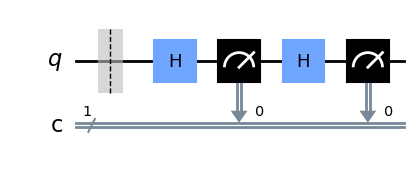

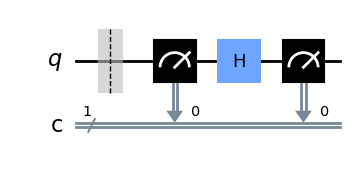

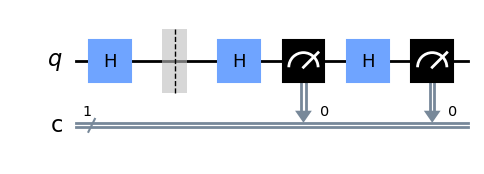

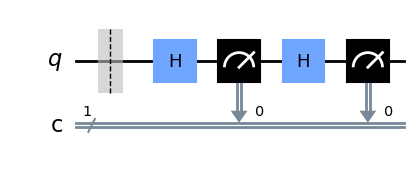

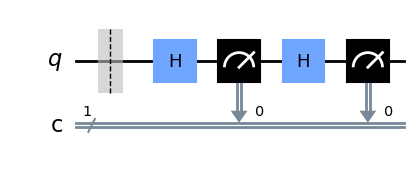

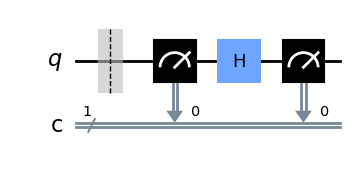

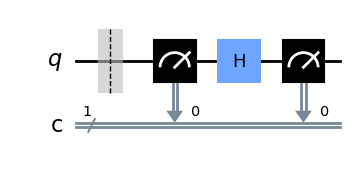

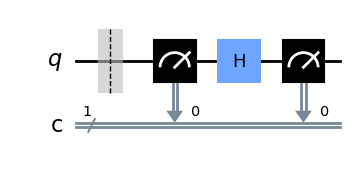

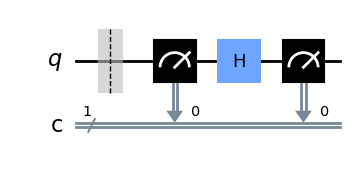

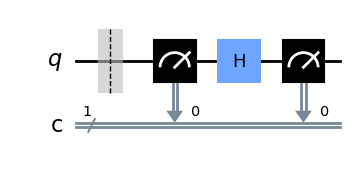

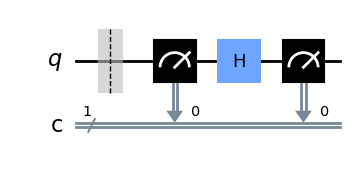

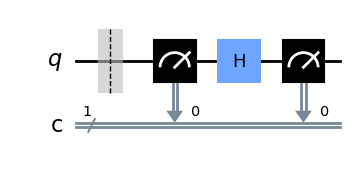

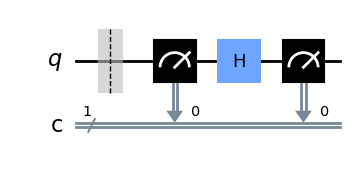

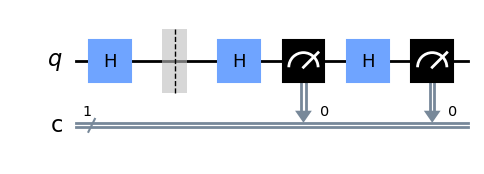

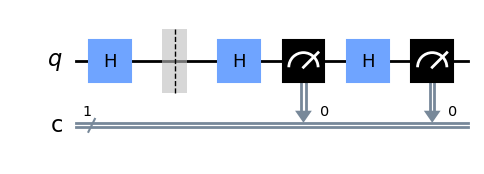

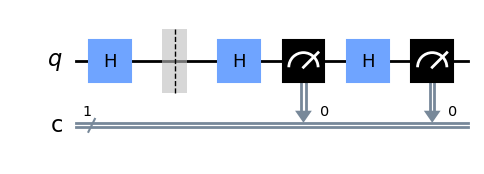

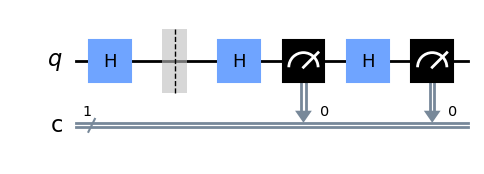

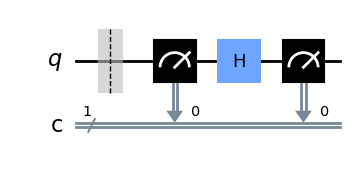

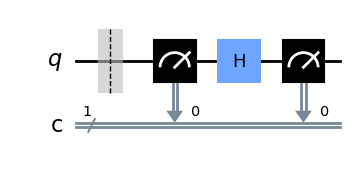

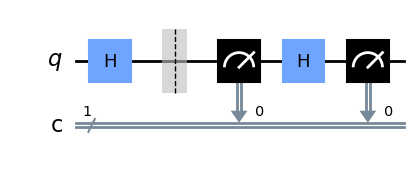

bob_result [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
eve interception [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Alice key [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
Bob key [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
length of Alice_key 37
length of Bob_key 37
Alice sample [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
Bob sample [1, 0, 0, 0, 0

In [79]:
import numpy as np


## Step 1
# Alice generates bits
A_bits = GenerateRandomBits(100)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
A_bases = GenerateRandomBits(100)

B_bases = GenerateRandomBits(100)

eve_bases = GenerateRandomBits(100)

def encode_message(A_bits, A_bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if A_bases[i] == 0: # Prepare qubit in Z-basis
            if A_bits[i] == 0:
                pass        # ket \0>
        else: # Prepare qubit in X-basis
            if A_bits[i] == 0:
                qc.h(0)     #ket \+>  
        qc.barrier()
        message.append(qc)
    return message

message=encode_message(A_bits, A_bases)
def measure_message(message, eve_bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if eve_bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if eve_bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
            display(message[q].draw('mpl'))
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements


intercepted_message = measure_message(message, eve_bases)

def measure_message(intercepted_message, B_bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if B_bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if B_bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
            display(message[q].draw('mpl'))
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

bob_result=measure_message(intercepted_message, B_bases)


def remove_garbage(A_bases, B_bases,bob_result):
    good_bits = []
    for q in range(n):
        if A_bases[q] == B_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bob_result[q])
    return good_bits

alice_key= remove_garbage(A_bases, B_bases, A_bits)
bob_key= remove_garbage(A_bases, B_bases,bob_result)



bits=15
selection = randint(n, size=bits)
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

alice_sample= sample_bits(alice_key, selection)
bob_sample= sample_bits(bob_key, selection)

print('bob_result',(bob_result))
print('eve interception',(intercepted_message))
print('Alice key', alice_key)
print("Bob key", bob_key ) 
print("length of Alice_key",len(alice_key))
print("length of Bob_key",len(bob_key))
print('Alice sample',alice_sample)
print('Bob sample',bob_sample)

alice_sample==bob_sample
if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")


# Error Correction of B92

In [80]:
alice_key= remove_garbage(A_bases, B_bases, A_bits)
bits=alice_key

print("A_bits",bits)
# Define the Hamming code functions
def parity_check(bits):
    # Calculates the parity bits for the given bits
    n = len(bits)
    k = n - int(np.log2(n)) - 1
    parity = [0] * (n - k)
    for i in range(n - k):
        for j in range(2**i - 1, n, 2**(i+1)):
            parity[i] ^= bits[j]
    return parity
print("parity check",parity_check(bits))

def encode_hamming(bits):
    # Encodes the given bits using Hamming code
    n = len(bits)
    k = int(np.log2(n+1))
    code = [0] * (n + k)
    j = 0
    for i in range(n + k):
        if i == 2**j - 1:
            j += 1
        else:
            code[i] = bits[i-j]
    parity = parity_check(code)
    for i in range(len(parity)):
        code[2**i-1] = parity[i]
    return code
print('encode_hamming',encode_hamming(bits))

def decode_hamming(bits):
    # Decodes the given bits using Hamming code
    n = len(bits)
    k = n - int(np.log2(n)) - 1
    syndrome = [0] * (n - k)
    for i in range(n - k):
        for j in range(2**i - 1, n, 2**(i+1)):
            syndrome[i] ^= bits[j]
    if sum(syndrome) == 0:
        return bits[:k]
    else:
        error_index = sum([2**i for i, b in enumerate(syndrome) if b == 1]) - 1
        corrected_bits = bits.copy()
        corrected_bits[error_index] ^= 1
        return corrected_bits[:k]
print('decode_hamming(bits)',decode_hamming(bits))

A_bits [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]
parity check [0, 0, 0, 0, 1, 0]
encode_hamming [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1]
decode_hamming(bits) [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]


In [81]:
bob_key= remove_garbage(A_bases, B_bases,bob_result)

bits=bob_key
print("bits",bits)

# Define the Hamming code functions
def parity_check_2(bits):
    # Calculates the parity bits for the given bits
    n = len(bits)
    k = n - int(np.log2(n)) - 1
    parity = [0] * (n - k)
    for i in range(n - k):
        for j in range(2**i - 1, n, 2**(i+1)):
            parity[i] ^= bits[j]
    return parity
print("parity check",parity_check_2(bits))

def encode_hamming_2(bits):
    # Encodes the given bits using Hamming code
    n = len(bits)
    k = int(np.log2(n+1))
    code = [0] * (n + k)
    j = 0
    for i in range(n + k):
        if i == 2**j - 1:
            j += 1
        else:
            code[i] = bits[i-j]
    parity = parity_check(code)
    for i in range(len(parity)):
        code[2**i-1] = parity[i]
    return code
print('encode_hamming',encode_hamming_2(bits))

def decode_hamming_2(bits):
    # Decodes the given bits using Hamming code
    n = len(bits)
    k = n - int(np.log2(n)) - 1
    syndrome = [0] * (n - k)
    for i in range(n - k):
        for j in range(2**i - 1, n, 2**(i+1)):
            syndrome[i] ^= bits[j]
    if sum(syndrome) == 0:
        return bits[:k]
    else:
        error_index = sum([2**i for i, b in enumerate(syndrome) if b == 1]) - 1
        corrected_bits = bits.copy()
        corrected_bits[error_index] ^= 1
        return corrected_bits[:k]
print('decode_hamming(bits)',decode_hamming_2(bits))


Alice_final_key=decode_hamming(bits)
Bob_final_key=decode_hamming_2(bits)

print("Alice_final_key",Alice_final_key)
print("Bob_final_key",Bob_final_key)

Alice_final_key==Bob_final_key



bits [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
parity check [1, 1, 0, 1, 0, 0]
encode_hamming [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
decode_hamming(bits) [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
Alice_final_key [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
Bob_final_key [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


True

# Privacy Amplification of B92

In [82]:
import hashlib
Alice_final_key

private_key = ''.join([bin(num)[2:].zfill(1) for num in Alice_final_key]) # combine the binary numbers into a single binary string


private_key

# assume the random seed for the hash function is stored as a binary string in the variable 'seed'
seed = "111001000110011101101111"

# apply the BBR protocol by hashing the raw key with the seed
hash_object = hashlib.sha256((private_key+seed).encode())
secure_key = hash_object.digest()


print("Alice_final_key",Alice_final_key)
print("private_key",private_key)
print("length of private_key",len(private_key))
# print the secure key in binary format
print("Secure key :", secure_key)

binarySecure=''.join(format(byte, '08b') for byte in secure_key)

print("Secure key binary:", len(binarySecure))
print("length of Secure key",len(secure_key))
print("Final_key",binarySecure)

Alice_final_key [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
private_key 0010001100111000110001010010100001010001100000
length of private_key 46
Secure key : b'\x0b\x05:\x05\xae3\xb8\xd8\xf2t\xcb.\x8b\x9fo\xb7|L,\xb5\xaa\x9c\x1d\xed\x08\xa5\xfcWC\x88\xf0\x05'
Secure key binary: 256
length of Secure key 32
Final_key 0000101100000101001110100000010110101110001100111011100011011000111100100111010011001011001011101000101110011111011011111011011101111100010011000010110010110101101010101001110000011101111011010000100010100101111111000101011101000011100010001111000000000101
